In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/fer2013.csv')

## Data Description
* emotion label (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)
* 48 X 48 pixels 
* The training set consists of 28,709 examples. <br>The public test set used for the leaderboard consists of 3,589 examples.<br>The final test set, which was used to determine the winner of the competition, consists of another 3,589 examples.

In [3]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [4]:
data.tail()

,emotion,pixels,Usage
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest
35886,2,19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...,PrivateTest


In [5]:
data.shape[0] # whole data size

35887

In [6]:
pixels = data['pixels'].tolist()

In [7]:
import numpy as np

In [8]:
faces = []

for pixel_row in pixels:
    face = [int(pixel) for pixel in pixel_row.split(' ')]
    face = np.asarray(face).reshape(48, 48) # pixel size
    faces.append(face.astype('float32'))

In [9]:
import matplotlib.pyplot as plt

In [10]:
faces = np.asarray(faces)

In [11]:
faces

array([[[ 70.,  80.,  82., ...,  52.,  43.,  41.],
        [ 65.,  61.,  58., ...,  56.,  52.,  44.],
        [ 50.,  43.,  54., ...,  49.,  56.,  47.],
        ...,
        [ 91.,  65.,  42., ...,  72.,  56.,  43.],
        [ 77.,  82.,  79., ..., 105.,  70.,  46.],
        [ 77.,  72.,  84., ..., 106., 109.,  82.]],

       [[151., 150., 147., ..., 129., 140., 120.],
        [151., 149., 149., ..., 122., 141., 137.],
        [151., 151., 156., ..., 109., 123., 146.],
        ...,
        [188., 188., 121., ..., 185., 185., 186.],
        [188., 187., 196., ..., 186., 182., 187.],
        [186., 184., 185., ..., 193., 183., 184.]],

       [[231., 212., 156., ...,  44.,  27.,  16.],
        [229., 175., 148., ...,  27.,  35.,  27.],
        [214., 156., 157., ...,  28.,  22.,  28.],
        ...,
        [241., 245., 250., ...,  57., 101., 146.],
        [246., 250., 252., ...,  78., 105., 162.],
        [250., 251., 250., ...,  88., 110., 152.]],

       ...,

       [[ 17.,  17.,  16

In [12]:
faces[0]

array([[ 70.,  80.,  82., ...,  52.,  43.,  41.],
       [ 65.,  61.,  58., ...,  56.,  52.,  44.],
       [ 50.,  43.,  54., ...,  49.,  56.,  47.],
       ...,
       [ 91.,  65.,  42., ...,  72.,  56.,  43.],
       [ 77.,  82.,  79., ..., 105.,  70.,  46.],
       [ 77.,  72.,  84., ..., 106., 109.,  82.]], dtype=float32)

In [13]:
faces[0].shape

(48, 48)

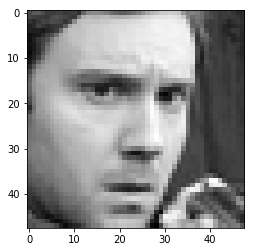

In [14]:
plt.imshow(faces[0], cmap='gray')

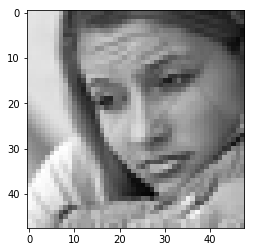

In [15]:
plt.imshow(faces[701], cmap='gray')

In [16]:
train_data = data[data['Usage']=='Training']

In [17]:
train_data.shape[0] # train data size

28709

In [18]:
train_data['emotion'].value_counts() # Show ratio by label in train data

3    7215
6    4965
4    4830
2    4097
0    3995
5    3171
1     436
Name: emotion, dtype: int64

In [19]:
faces = np.asarray(faces)
faces = np.expand_dims(faces, -1) 

emotions = pd.get_dummies(data['emotion']).values
emotions

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=uint8)